In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

%matplotlib inline

In [109]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


In [76]:
df.describe(percentiles=[0.025,0.975,0.50,0.25,0.75]).T

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
value,1304.0,67220.683282,59339.639956,1201.0,17876.4,35757.75,57197.5,83883.0,177613.075,1173655.0


In [77]:
df = df[(df['value']> df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

In [78]:
df.describe(percentiles=[0.025,0.975,0.50,0.25,0.75]).T

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
value,1238.0,63060.147819,31674.626598,18060.0,21503.55,37244.25,57197.5,81646.5,136873.9,177588.0


In [79]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
#The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be 
#"Date" and the label on the y axis should be "Page Views"

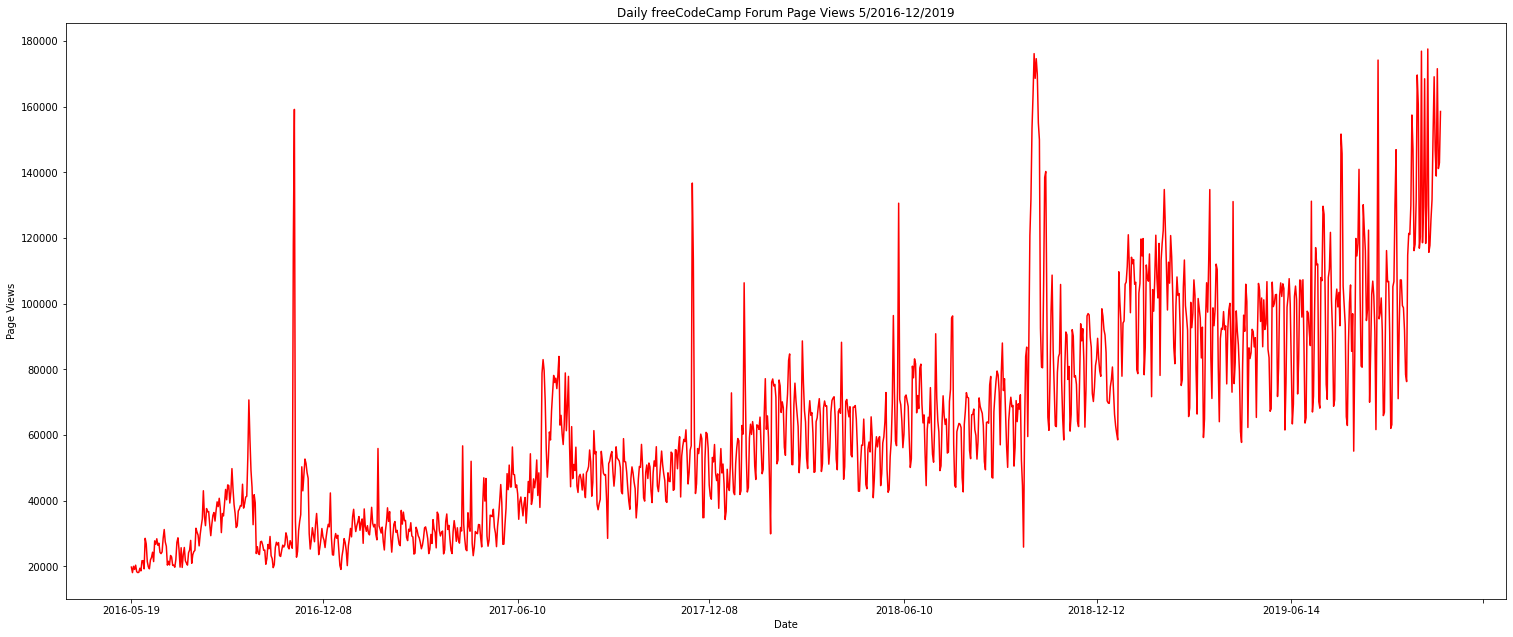

In [107]:
import matplotlib.dates as mdates
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(df['value'],color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.ylabel('Page Views')
plt.xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator((1,7)))

In [ ]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of "Months". 
# On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [131]:
df2 = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df2 = df.groupby(["year", "month"])["value"].mean()
df2

year  month
2016  5         11242.695652
      6         19124.366667
      7         23314.225806
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       112592.000000
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [132]:
df2 = df2.unstack()
df2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


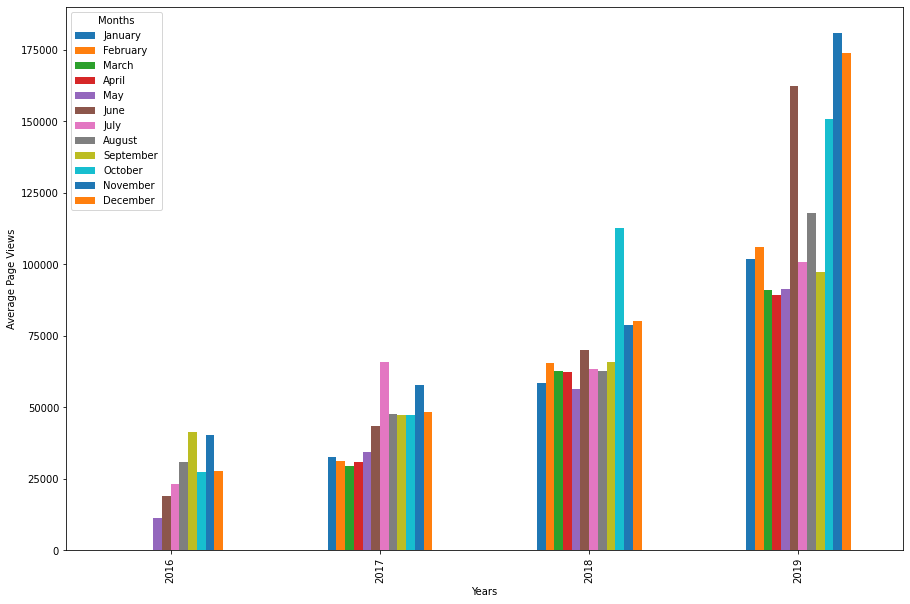

In [133]:
df2 = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df2 = df.groupby(["year", "month"])["value"].mean()
df2 = df2.unstack()
fig = df2.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend( title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [134]:
# Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
# These box plots should show how the values are distributed within a given year or month and how it compares over time. 
# The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart 
# should be "Month-wise Box Plot (Seasonality)". 
# Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

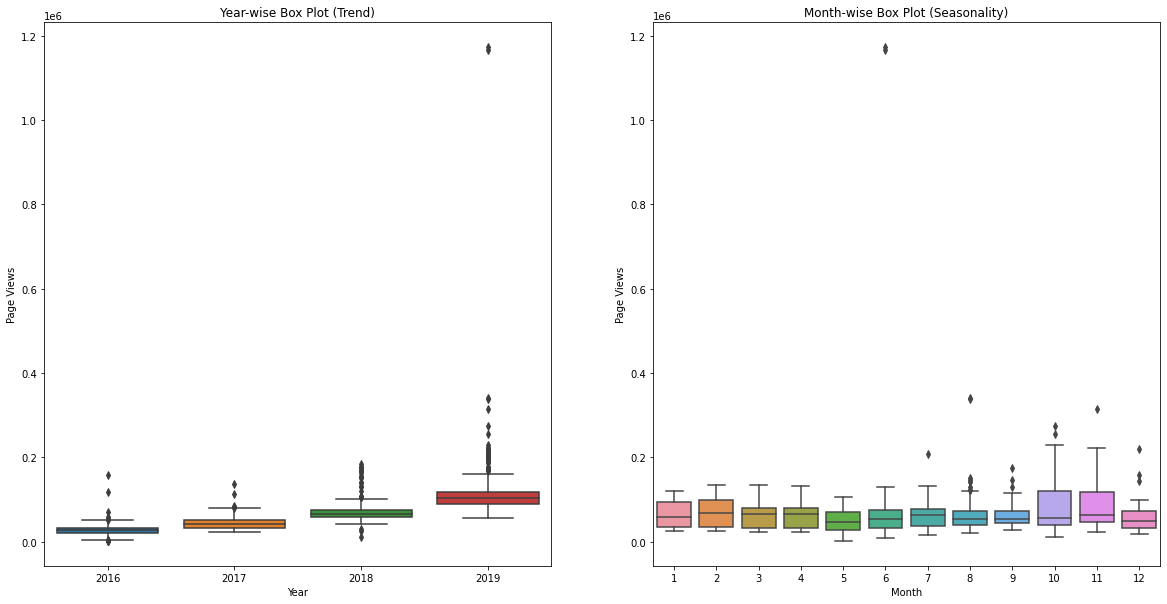

In [169]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1 = sns.boxplot(x='year', y='value',data = df3, orient='v', ax=ax1)
ax2 = sns.boxplot(x='month', y='value',data = df3, orient='v', ax=ax2)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
plt.show()